In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
!pip install arabic_reshaper
!pip install python-bidi==0.4.1
!pip install persian_tools
!pip install pandas
!pip install plotly
!pip install openpyxl
!pip install nbformat>=4.2.0

  Using cached python_bidi-0.4.1-py2.py3-none-any.whl (30 kB)
  Attempting uninstall: python-bidi
    Found existing installation: python-bidi 0.4.2
    Uninstalling python-bidi-0.4.2:
      Successfully uninstalled python-bidi-0.4.2
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [3]:
!pip install matplotlib

                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB 640.0 kB/s eta 0:00:12
                                              0.0/7.6 MB 640.0 kB/s eta 0:00:12
                                              0.0/7.6 MB 640.0 kB/s eta 0:00:12
                                              0.0/7.6 MB 640.0 kB/s eta 0:00:12
                                              0.0/7.6 MB 640.0 kB/s eta 0:00:12
                                              0.0/7.6 MB 640.0 kB/s eta 0:00:12
                                              0.0/7.6 MB 640.0 kB/s eta 0:00:12
                                              0.0/7.6 MB 640.0 kB/s eta 0:00:12
                                              0.0/7.6 MB 640.0 kB/s eta 0:00:12
                                              0.0/7.6 MB 63.3 kB/s 

In [11]:
!pip install python-bidi==0.4.1

In [4]:

from matplotlib import font_manager as fm
from bidi.algorithm import get_display
from arabic_reshaper import reshape
from persian_tools.digits import convert_to_fa
# Left_to_Right persian text for plot
def reshape_farsi_text(x):
    reshaped_text = reshape(x)
    farsi_text = get_display(reshaped_text)
    return farsi_text

# Create a FontProperties object using the path to the font file
def persian_font(size=12):

  # fpath = '/content/XB NiloofarBd.ttf'
  fpath = "E:\Project\plot\IRANSans 400.ttf"
  font = fm.FontProperties(fname=fpath,size=size)
  return font


def camma_sep(num):
  num = str(num)[::-1]
  return ",".join([num[i:i+3][::-1] for i in range(0, len(num), 3)][::-1])

def nums_to_persian(nums,camma_sep_=True):
  if camma_sep_:
    return [camma_sep(convert_to_fa(str(num))) for num in nums]
  return [convert_to_fa(str(num)) for num in nums]
def date_to_persian(date):
  return "/".join(nums_to_persian(date.split("/"),False))


In [ ]:
nums1,nums2=[17000,5000 , 12900],[16594,4124 , 12470]
dates=['1399/02/20','1402/03/02','1399/04/02']

date_to_persian(dates[0])


'۱۳۹۹/۰۲/۲۰'

plt.plot(x, y, color='green', linestyle='dotted', linewidth = 3 ,marker = 'o', markersize = 8 , markerfacecolor = "red")

In [ ]:
nums1,nums2=[17000,5000 , 12900],[16594,4124 , 12470]
dates=['1399/02/20','1402/03/02','1399/04/02']
def date_to_persian(date,spliter='/'):

  return spliter.join(nums_to_persian(date.split(spliter),False))

date_to_persian(dates[0])


'۱۳۹۹/۰۲/۲۰'

In [ ]:
# pd.to_datetime("1399/02/18")
import jdatetime 
x=jdatetime.datetime.strptime("1399/02/18",'%Y/%m/%d')
x.date()

jdatetime.date(1399, 2, 18)

In [ ]:

def line_plot(data,title,persian_font,size_plot,size_title,size_labels,size_ticks,legend):
  sns.set_theme(style="darkgrid")
  size_plot = tuple(map(lambda x:x/100,size_plot))
  labels=list(map(reshape_farsi_text,data.keys()))
  # df=pd.DataFrame(data).T
  # df.sort_index(inplace=True)
  df=dict_fillna_2columns(data,return_df=True)
  fig = plt.figure(figsize=size_plot)
  ax = fig.add_subplot(111)
  ax.plot(df,marker = 'o' ,  markersize=6 )
  plt.title(reshape_farsi_text(title),fontproperties=persian_font(size_title))
  dates = df.index.values
  yticks=list(map(int,plt.gca().get_yticks()))
  plt.yticks(yticks,nums_to_persian(yticks),fontproperties=persian_font(size_ticks))
  ax.set_ylabel(reshape_farsi_text("قیمت به‌ریال"),fontproperties=persian_font(size_labels))
  dates_persian=map(lambda date:"/".join(nums_to_persian(str(date).split("/"),False)),dates)
  plt.xticks(dates,dates_persian,fontproperties=persian_font(size_ticks))
  ax.set_xlabel(reshape_farsi_text('تاریخ'),fontproperties=persian_font(size_labels))
  legend = list(map(reshape_farsi_text,legend))
  plt.legend(legend)
  plt.show()
  # canvas = FigureCanvas(fig)
  # response = HttpResponse(content_type='image/png')
  # canvas.print_png(response)
  # return response


In [ ]:
def plot_milei_amoodi(nums,labels,size_plot,persian_font,color,title,font_title):
  size_plot = tuple(map(lambda x:x/100,size_plot))
  fig = plt.figure(figsize=size_plot)
  ax = fig.add_subplot(111)
  x_pos=list(range(len(nums),0,-1))
  labels=map(reshape_farsi_text,labels)
  ax.bar(x_pos,nums,align='edge',color=color)
  plt.title(reshape_farsi_text(title),fontproperties=font_title)
  ax.set_xticks(x_pos,labels,rotation=20,fontproperties=persian_font)
  yticks=list(map(int,plt.gca().get_yticks()))
  plt.yticks(yticks,nums_to_persian(yticks),fontproperties=persian_font)
  plt.grid(True)
  canvas = FigureCanvas(fig)
  response = HttpResponse(content_type='image/png')
  canvas.print_png(response)
  return response


In [ ]:
def plot_milei_ofoghi(nums,labels,size_plot,persian_font,color,title,font_title):
  sns.set_theme(style="darkgrid")
  size_plot = tuple(map(lambda x:x/100,size_plot))
  fig = plt.figure(figsize=size_plot)
  ax = fig.add_subplot(111)
  labels=map(reshape_farsi_text,labels)
  y_pos=list(range(len(nums)))
  ax.barh(y_pos,nums,align='center',color=color)
  ax.set_yticks(y_pos,labels,rotation=60,fontproperties=persian_font)
  plt.title(reshape_farsi_text(title),fontproperties=font_title)
  xticks=list(map(int,plt.gca().get_xticks()))
  plt.xticks(xticks,nums_to_persian(xticks),fontproperties=persian_font)
  plt.grid(True)

  canvas = FigureCanvas(fig)
  response = HttpResponse(content_type='image/png')
  canvas.print_png(response)

  return response

In [ ]:
# !pip install --upgrade nbformat

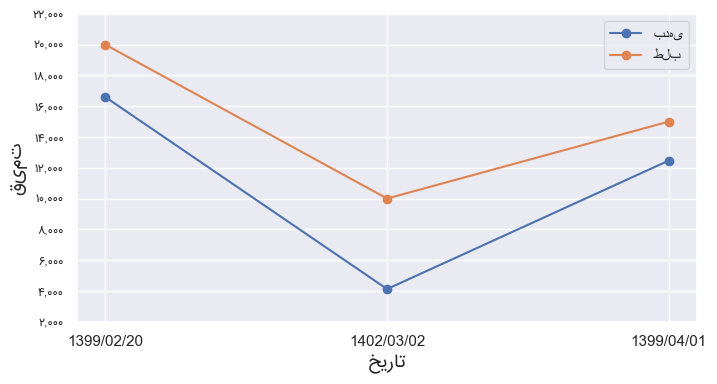

In [ ]:
### test line


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def line(data,font_label,size_plot,font_title):#,color,title,font_title):
  # 1402/06/22
  labels=list(map(reshape_farsi_text,data.keys()))

  sns.set_theme(style="darkgrid")
# labels=map(reshape_farsi_text,labels)

  fig = plt.figure(figsize=size_plot)
  ax = fig.add_subplot(111)
  for k,v in data.items():
    ax.plot(v.keys(), v.values(), label=k,marker = 'o' , markersize=6 ) #, markerfacecolor = "k")
  # ax.plot(dates, list2, label=labels[1],marker = 'o' ,  markersize=6 , markerfacecolor = "k")

  # dates = sorted([data[k].keys() for k in data.keys()])
  dates = plt.gca().get_xticks()
  yticks=list(map(int,plt.gca().get_yticks()))
  plt.yticks(yticks,nums_to_persian(yticks),fontproperties=font_label)

  ax.set_ylabel("قیمت",fontproperties=font_title)

  dates_persian=map(lambda date:"/".join(nums_to_persian(str(date).split("/"),False)),dates)
  # plt.xticks(dates,dates_persian,fontproperties=font_label)

  ax.set_xlabel(reshape_farsi_text('تاریخ'),fontproperties=font_title)
  plt.grid(True)
  plt.legend()
  plt.show()

nums1,nums2=[17000,5000 , 12900],[16594,4124 , 12470]
dates=['1399/02/20','1402/03/02','1399/04/02']


data = {
    'بدهی': {
        '1399/02/20':16594 ,
        '1402/03/02':4124 ,
        '1399/04/01':12470
    } ,

    'طلب':{
        '1399/02/20':20000 ,
        '1402/03/02':10000 ,
        '1399/04/01':15000
    }
}


size_plot =(8,4)

line(data,persian_font(8),size_plot,persian_font(12)  )# ,size_plot)
# line([list1,list2],dates,['طلب ها ','بدهی ها'],persian_font()  )# ,size_plot)

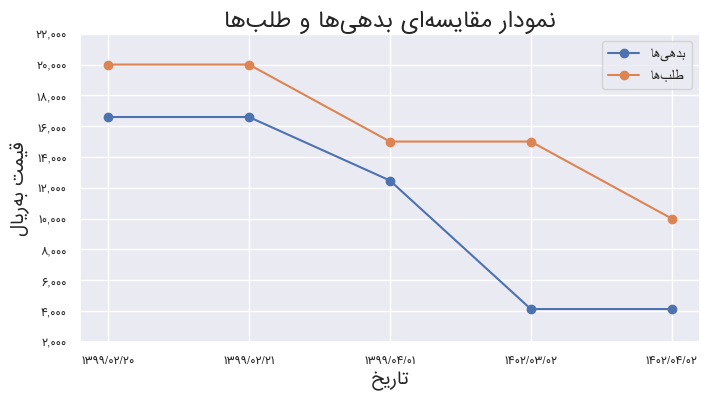

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def dict_fillna_2columns(data,return_df=False):
    df=pd.DataFrame(data)
    df.sort_index(inplace=True)
    df.fillna(method='ffill',inplace=True)
    df.fillna(method='bfill',inplace=True)
    if df.isna().sum().sum() >0:
        df.fillna(df.mean(),inplace=True)
    elif df.isna().sum().sum() >0:
        df.fillna(0,inplace=True)
    if return_df:
        return df
    dates =df.index
    values1 =np.array(df.values[:,0]).tolist()
    values2 =np.array(df.values[:,1]).tolist()
    return dates,values1,values2

data = {
    'بدهی': {
        '1399/02/21':16594 ,
        '1402/03/02':4124 ,
        '1399/04/01':12470
    } ,

    'طلب':{
        '1399/02/20':20000 ,
        '1402/04/02':10000 ,
        '1399/04/01':15000
    }
}

def line_plot(data,title,persian_font,size_plot,size_title,size_labels,size_ticks,legend):
  sns.set_theme(style="darkgrid")
  size_plot = tuple(map(lambda x:x/100,size_plot))
  labels=list(map(reshape_farsi_text,data.keys()))
#   df=DataFrame(data).T
#   df.sort_index(inplace=True)
  df=dict_fillna_2columns(data,return_df=True)
  fig = plt.figure(figsize=size_plot)
  ax = fig.add_subplot(111)
  ax.plot(df,marker = 'o' ,  markersize=6 )
  plt.title(reshape_farsi_text(title),fontproperties=persian_font(size_title))
  dates = df.index.values
  yticks=list(map(int,plt.gca().get_yticks()))

  plt.yticks(yticks,nums_to_persian(yticks),fontproperties=persian_font(size_ticks))
  ax.set_ylabel(reshape_farsi_text("قیمت به‌ریال"),fontproperties=persian_font(size_labels))

  dates_persian=map(lambda date:"/".join(nums_to_persian(str(date).split("/"),False)),dates)
  plt.xticks(dates,dates_persian,fontproperties=persian_font(size_ticks))
  ax.set_xlabel(reshape_farsi_text('تاریخ'),fontproperties=persian_font(size_labels))

  legend = list(map(reshape_farsi_text,legend))
  plt.legend(legend)
  plt.show()
  # canvas = FigureCanvas(fig)
  # response = HttpResponse(content_type='image/png')
  # canvas.print_png(response)

  # return response
size_plot =(800,400)
size_title = 15
# size_labels == قیمت و تاریخ
size_labels = 12
size_ticks = 8
title = "نمودار مقایسه‌ای بدهی‌ها و طلب‌ها"
legend = ['بدهی‌ها',"طلب‌ها"]

data= {
    "1399/02/19":{
        "طلب":16594,
        "بدهی":4124
    } ,
    "1402/03/03":{
        "طلب":1694,
        "بدهی":424
    } ,
    "1402/03/01":{
        "طلب":15594,
        "بدهی":5124
    }}



data = {
    'بدهی': {
        '1399/02/21':16594 ,
        '1402/03/02':4124 ,
        '1399/04/01':12470
    } ,

    'طلب':{
        '1399/02/20':20000 ,
        '1402/04/02':10000 ,
        '1399/04/01':15000
    }
}

line_plot(data,title,persian_font,size_plot,size_title,size_labels,size_ticks,legend)


In [14]:
def dict_fillna_columns(data):
    df=pd.DataFrame(data)
    df.sort_index(inplace=True)
    df.fillna(method='ffill',inplace=True)
    df.fillna(method='bfill',inplace=True)
    if df.isna().sum().sum() >0:
        df.fillna(df.mean(),inplace=True)
    elif df.isna().sum().sum() >0:
        df.fillna(0,inplace=True)
    dates =df.index
    values =df.values

    # return dates,values1,values2
    return dates,values,len(df.columns)
    



data = {
    'بدهی': {
        '1399/02/21':16594 ,
        '1402/03/02':4124 ,
        '1399/04/01':12470
    } ,

    'طلب':{
        '1399/02/20':20000 ,
        '1402/04/02':10000 ,
        '1399/04/01':15000
    }
}

dict_fillna_columns(data)

(Index(['1399/02/20', '1399/02/21', '1399/04/01', '1402/03/02', '1402/04/02'], dtype='object'),
 array([[16594., 20000.],
        [16594., 20000.],
        [12470., 15000.],
        [ 4124., 15000.],
        [ 4124., 10000.]]),
 2)

In [13]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
# px.line()


# return dates,values1,values2
def bar_line_title(labels):
    return f"نمودار مقایسه بین {labels[0]} و {labels[1]}"

def dict_fillna_ncolumns(data):
    df=pd.DataFrame(data)
    df.sort_index(inplace=True)
    df.fillna(method='ffill',inplace=True)
    df.fillna(method='bfill',inplace=True)
    if df.isna().sum().sum() >0:
        df.fillna(df.mean(),inplace=True)
    elif df.isna().sum().sum() >0:
        df.fillna(0,inplace=True)
    x =df.index
    values =df.values

    return x,values,len(df.columns)
    

def line_or_bar_plot(type_plot,data,labels_y,labels_x,color,size_plot,title):
    x,values,n_column=dict_fillna_ncolumns(data)
    title=title
    if (len(labels_y) != n_column) or (len(color) != n_column):
        raise ValueError("len(labels) not equal with len(data) or len(color)")
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    for i in range(n_column):
        if type_plot=="bar":
            fig.add_trace(
                go.Bar(x=x, y=values[:,i],
                name=f"<b>{labels_y[i]}</b>",
                textfont={'family':"IRANSans","size":size_plot[0]/30} ,
                marker=dict(color=color[i]),
            ), 
                secondary_y=False
            )
        elif type_plot=="line":
            fig.add_trace(
                go.Scatter(x=x, y=values[:,i],
                name=f"<b>{labels_y[i]}</b>",
                 mode='lines',
                textfont={'family':"IRANSans","size":size_plot[0]/30} ,
                marker=dict(color=color[i]),
            ), 
                secondary_y=False
            )
        elif type_plot=="hbar":
            fig.add_trace(
                go.Bar(x=values[:,i], y=x,
                name=f"<b>{labels_y[i]}</b>",
                textfont={'family':"IRANSans","size":size_plot[0]/30} ,
                marker=dict(color=color[i]),
                orientation='h'),
                secondary_y=False
            )
        else : raise ValueError("<b>typee_plot</b> is not set correctly ")
        
    y=round(0.85 +size_plot[1]/5000,2)
    y = y if y<1 else 1
    
    fig.update_layout(
        ## title of plot and size its
        title = {'text': title,"xanchor":'center',"yanchor":'top',"y": y,"x":0.5,
                 "font":{
                        'family':"IRANSans",
                        'size':int(size_plot[0]/30),
                        # 'color':"#7f7f7f"
                        'color':"black" } ,   },
        ## size , font for hint of plot
        legend={
                "font":{
                        'family':"IRANSans",
                        'size':int(size_plot[0]/50),} ,
                },
    )
    ## title for axis x , y
    if type_plot == "hbar":
        fig.update_layout(
        xaxis_title="<b>مبلغ (به ریال)</b>",
        yaxis_title=f"<b>{labels_x}</b>",
        )
    
    else:
        fig.update_layout(xaxis_title=f"<b>{labels_x}</b>",
        yaxis_title="<b>مبلغ (به ریال)</b>",)
        
    ## font , size for title axis
    fig.update_layout(
    xaxis=dict(tickfont={"size":int(size_plot[0]/55),'family':"IRANSans"}),
    yaxis=dict(tickfont=dict(size=int(size_plot[1]/40),family="IRANSans")),
                    )
    ## size_plot
    fig.update_layout(width=size_plot[0], height=size_plot[1])
    

    fig.show()
    # plt_div = plot(fig, output_type='div')
    # return plt_div

size_plot =(700,300)
labels_y=[ "طلب‌ها" ,"بدهی ها","نسیه ها"]

data = {
    'بدهی': {
        '1399/02/21':16594 ,
        # '1402/03/02':4124 ,
        # '1399/04/01':12470
    } ,
    
    'طلب':{
        '1399/02/20':20000 ,
        # '1402/04/02':10000 ,
        # '1399/04/01':15000
    } ,

    'نسیه':{
        '1399/05/20':25000 ,
        # '1402/01/02':11000 ,
        # '1399/08/01':13000
    }
}

labels_x = "تاریخ"
color=["magenta","blue","deeppink"]
#### type_plot ("bar" or "line" or "hbar")
type_plot = "hbar"
title="نمودار مقایسه با محوریت زمان"
line_or_bar_plot(type_plot,data,labels_y,labels_x,color,size_plot,title)

## bar sade

In [24]:
def bar_plot(type_plot,data,labels,color,size_plot,titl):
    values,n_column=tuple(data.values()),len(data.keys())
    title=titl
    if (len(labels) != n_column) or (len(color) != n_column):
        raise ValueError("len(labels) not equal with len(data) or len(color)")
    
    if type_plot=="bar":
        
        fig = go.Figure(
            go.Bar(x=labels, y=values,
            # name=f"<b>{labels_y[i]}</b>",
            textfont={'family':"IRANSans","size":size_plot[0]/30} ,
            marker=dict(color=color),
        ), 
            # secondary_y=False
        )
    elif type_plot=="hbar":
            fig = go.Figure(
                go.Bar(x=values, y=labels,
                # name=f"<b>{labels[i]}</b>",
                textfont={'family':"IRANSans","size":size_plot[0]/30} ,
                marker=dict(color=color),
                orientation='h'),
                # secondary_y=False
            )
    else : raise ValueError("<b>typee_plot</b> is not set correctly ")
        
    y=round(0.85 +size_plot[1]/5000,2)
    y = y if y<1 else 1
    fig.update_layout(
        ## title of plot and size its
        title = {'text': title,"xanchor":'center',"yanchor":'top',"y": y,"x":0.5,
                 "font":{
                        'family':"IRANSans",
                        'size':int(size_plot[0]/30),
                        # 'color':"#7f7f7f"
                        'color':"black" } ,   },
        ## size , font for hint of plot
        legend={
                "font":{
                        'family':"IRANSans",
                        'size':int(size_plot[0]/50),} ,
                },
    )
    ## title for axis x , y
    # if type_plot == "hbar":
    #     fig.update_layout(
    #     xaxis_title="<b>مبلغ (به ریال)</b>",
    #     yaxis_title=f"<b>{labels_x}</b>",
    #     )
    
    # else:
    #     fig.update_layout(xaxis_title=f"<b>{labels_x}</b>",
    #     yaxis_title="<b>مبلغ (به ریال)</b>",)
        
    # ## font , size for title axis
    # fig.update_layout(
    # xaxis=dict(tickfont={"size":int(size_plot[0]/55),'family':"IRANSans"}),
    # yaxis=dict(tickfont=dict(size=int(size_plot[1]/40),family="IRANSans")),
    #                 )
    ## size_plot
    fig.update_layout(width=size_plot[0], height=size_plot[1])

    # fig.show()
    plt_div = plot(fig, output_type='div')
    return plt_div

data = {
    'بدهی':16594 ,
    'طلب': 20000 ,
}
data
size_plot =(500,300)
labels=[ "طلب‌ها" ,"بدهی ها",]
color=["magenta","blue"]
#### type_plot ("bar" or or "hbar")
type_plot = "hbar"
title="نمودار مقایسه با محوریت زمان"
bar_plot(type_plot,data,labels,color,size_plot,title)

##  plots

In [16]:
def bar_line_data_convertor(data):
    data_sorted=sorted(data.items())
    dates =tuple(map(lambda d:d[0],data_sorted))
    values =tuple(map(lambda d:d[1],data_sorted))
    return dates,values


bar_line_data_convertor(data)

(('بدهی', 'طلب'),
 ({'1399/02/21': 16594, '1402/03/02': 4124, '1399/04/01': 12470},
  {'1399/02/20': 20000, '1402/04/02': 10000, '1399/04/01': 15000}))

In [ ]:
nums=[16594,4124 , 12470]
labels = ["توانایی پرداخت بدهی ها با احتساب مطالبات جاری","مجموع بدهی جاری فعلی واحد تجاری ","مازاد  یا کسری وجه نقد"]
y_pos=list(range(len(nums)))
title = "توانایی پرداخت بدهی"

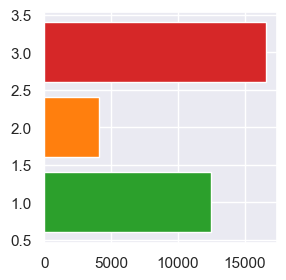

In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# nums=[4124,16594 ]
# labels = ["مجموع بدهی جاری فعلی واحد تجاری ","توانایی پرداخت بدهی ها با احتساب مطالبات جاری","مازاد وجه نقد"]
size_plot=(300,300)
color = ['tab:red','tab:orange','tab:green']
# nums.append(nums[1]-nums[0])
# if nums[-1] < 0:
#   color[-1]='tab:red'
#   nums[-1]=abs(nums[-1])
#   labels[-1]='کسری وجه نقد'
# title="توان پرداخت بدهی"


def barh(nums,labels,size_plot,persian_font,color,title,font_title):
  size_plot=tuple(map(lambda x:x/100 , size_plot ))
  labels=map(reshape_farsi_text,labels)

  sns.set_theme(style="darkgrid")

  y_pos=list(range(len(nums),0,-1))

  fig = plt.figure(figsize=size_plot)
  ax = fig.add_subplot(111)
  ax.barh(y_pos,nums,align='center',color=color)

  # ax.set_yticks(y_pos,labels,rotation=30,fontproperties=persian_font)
  # plt.title(reshape_farsi_text(title),fontproperties=font_title)

  # xticks=list(map(int,plt.gca().get_xticks()))
  # plt.xticks(xticks,nums_to_persian(xticks),fontproperties=persian_font)
  # plt.grid(True)

  plt.show()


# plt.yticks(y_pos,labels)
barh(nums,labels,size_plot,persian_font(10),color,title,persian_font(15))

[8. 4.]


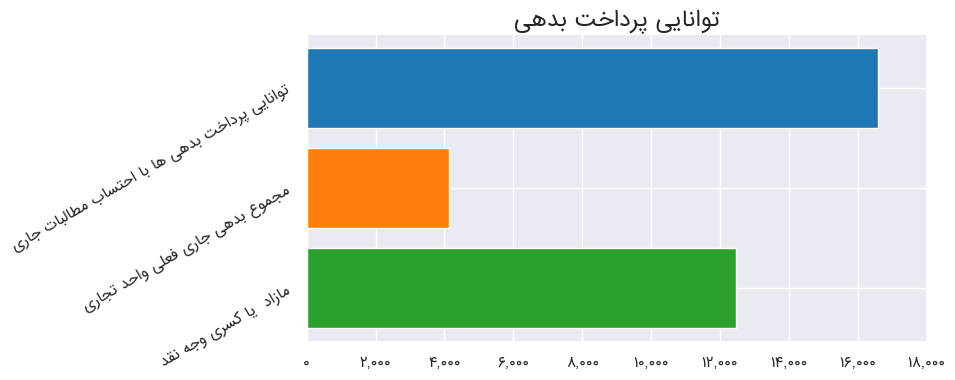

In [ ]:
nums=[16594,4124 , 12470]
labels = ["توانایی پرداخت بدهی ها با احتساب مطالبات جاری","مجموع بدهی جاری فعلی واحد تجاری ","مازاد  یا کسری وجه نقد"]
y_pos=list(range(len(nums)))
title = "توانایی پرداخت بدهی"
color = ['tab:blue','tab:orange','tab:green']
size_plot=(8,4)
# from matplotlib.figure import Figure

def barh(nums,labels,size_plot,persian_font,color,title,font_title):

  labels=map(reshape_farsi_text,labels)

  # sns.set_theme(style="darkgrid")

  y_pos=list(range(len(nums),0,-1))

  fig = plt.figure(figsize=size_plot)
  ax = fig.add_subplot(111)

  # f, ax = plt.subplots(figsize=size_plot)
  ax.barh(y_pos,nums,align='center',color=color)

  ax.set_yticks(y_pos,labels,rotation=30,fontproperties=persian_font)
  plt.title(reshape_farsi_text(title),fontproperties=font_title)

  xticks=list(map(int,plt.gca().get_xticks()))
  plt.xticks(xticks,nums_to_persian(xticks),fontproperties=persian_font)
  plt.grid(True)
  fig_size = fig.get_size_inches()
  print(fig_size)
  plt.show()

barh(nums,labels,size_plot,persian_font(10),color,title,persian_font(15))




## barplot

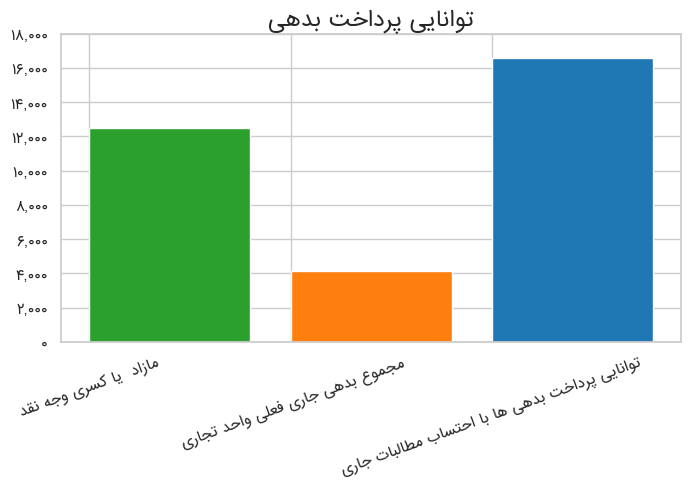

In [ ]:

def bar(nums,labels,size_plot,persian_font,color,title,font_title):

  labels=map(reshape_farsi_text,labels)

  sns.set_theme(style="whitegrid")

  x_pos=list(range(len(nums),0,-1))

  fig = plt.figure(figsize=size_plot)
  ax = fig.add_subplot(111)

  # f, ax = plt.subplots(figsize=size_plot)
  ax.bar(x_pos,nums,align='edge',color=color)
  ax.set_xticks(x_pos,labels,rotation=20,fontproperties=persian_font)

  yticks=list(map(int,plt.gca().get_yticks()))

  plt.title(reshape_farsi_text(title),fontproperties=font_title)
  plt.yticks(yticks,nums_to_persian(yticks),fontproperties=persian_font)
  plt.grid(True)
  plt.show()

title = "توانایی پرداخت بدهی"

# plt.yticks(y_pos,labels)
bar(nums,labels,size_plot,persian_font(10),color,title,persian_font(15))

In [ ]:
nums = [4124, 16594, 12470]
color = ['tab:blue','tab:orange','tab:green']
labels = ["مجموع بدهی جاری فعلی واحد تجاری ","توانایی پرداخت بدهی ها در حال حاضر با احتساب مطالبات جاری","مازاد"]

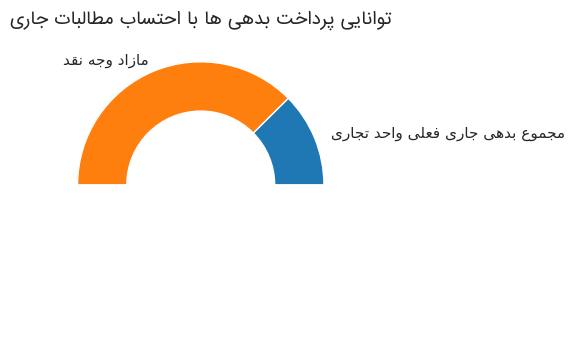

In [ ]:
from matplotlib.figure import Figure
import numpy as np
import matplotlib.pyplot as plt

def semi_pie_plot(nums,labels,size_plot,persian_font,color,title):
    labels=list(map(reshape_farsi_text,labels))
    fig = plt.figure(figsize=size_plot,dpi=100)
    # canvas = FigureCanvas(fig)
    ax1 = fig.add_subplot(111)
    nums.append(sum(nums))
    color.append("white")
    labels.append('')
    ax1.pie(nums, labels=labels, colors=color)
    # ax2 = fig.add_subplot(111)
    plt.title(reshape_farsi_text(title),fontproperties=persian_font)
    ax1.add_artist(plt.Circle((0, 0), 0.6, color='white'))
    plt.show()

col = color[:2].copy()
lab = ["مجموع بدهی جاری فعلی واحد تجاری ","مازاد وجه نقد"]
titl="توانایی پرداخت بدهی ها با احتساب مطالبات جاری"
semi_pie_plot([4124, 12470],lab,size_plot,persian_font(),col,titl)

In [ ]:
val=[16594,4123 , 12470]

In [ ]:
nums=[16594 ,4124, 12470]
labels = ["توانایی پرداخت بدهی ها با احتساب مطالبات جاری","مجموع بدهی جاری فعلی واحد تجاری ","مازاد وجه نقد"]


In [12]:
import  nbformat

In [1]:

# !pip install plotly
# !pip install plotly django-plotly-dash
# !pip  install nbformat==5.9.2
# !pip install dash



### app.py
import plotly.graph_objects as go
from plotly.graph_objects import Indicator ,Figure
import numpy as np
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
def speedometer_plot(abiliti_to_pay,total_debt,labels,to_lend,title,color_bar,size_plot):

    max_=abiliti_to_pay + to_lend

    range_ticks=np.linspace(0,max_,8,dtype='int32')

    #roundـsmallerـthousand
    range_ticks_rounded = list(map(lambda n: int(n//1000*1000) if len(str(n)) > 3 else n , range_ticks))
    # list_ticks_persian = nums_to_persian(map (str,range_ticks_rounded))

    fig = go.Figure(Indicator(
        mode = "gauge+number+delta",

        value = abiliti_to_pay,
        delta = {"reference": total_debt } ,
        gauge = {'axis': {
                        # 'range': [None, max_],
                        'tickvals': range_ticks_rounded,
                        # 'ticktext':list_ticks_persian ,
                        'tickfont': {'size': int(size_plot[0]/40) , "family":'IRANSans'}
                        },
                 "bar":{'color':color_bar}
                 } ,
        domain = {'x': [0, 1], 'y': [0, 1]},

        title = {'text': title,"font":{
                        'family':"IRANSans",
                        'size':int(size_plot[0]/25),
                        # 'color':"#7f7f7f"
                        'color':"black" } ,
                 } ,
        # width=size_plot[0],
        # height=size_plot[1]
    )
    )
    # fig.update_layout()
    fig.show()
    
    
    # app = dash.Dash(__name__)
    # app.layout = html.Div([dcc.Graph(figure=fig)])
    # return app

# توانایی پرداخت
abiliti_to_pay =  123451234
# بدهی
total_debt = 12345123

# to_lend = نسیه
to_lend = 123450000

color_bar ="blue"
size_plot=(700,400)
title="توانایی پرداخت بدهی"
labels = ["توانایی پرداخت بدهی","مجموع بدهی جاری","مازاد یا کسری وجه نقد"]



speedometer_plot(abiliti_to_pay,total_debt,labels,to_lend,title,color_bar,size_plot)


In [9]:
from plotly.offline import plot

import plotly.graph_objects as go
from plotly.graph_objects import Indicator ,Figure
def speedometer_plot(abiliti_to_pay,total_debt,labels,to_lend,title,color_bar,size_plot):

    max_=abiliti_to_pay + to_lend

    range_ticks=np.linspace(0,max_,8,dtype='int32')

    #roundـsmallerـthousand
    range_ticks_rounded = list(map(lambda n: int(n//1000*1000) if len(str(n)) > 3 else n , range_ticks))
    list_ticks_persian = nums_to_persian(map (str,range_ticks_rounded))


    fig = go.Figure(go.Indicator(
        # plot_div = plot([Indicator(
        mode = "gauge+number+delta",

        value = abiliti_to_pay,
        delta = {"reference": total_debt } ,
        gauge = {'axis': {
                        # 'range': [None, max_],
                        'tickvals': range_ticks_rounded,
                        # 'ticktext':list_ticks_persian ,
                        'tickfont': {'size': int(size_plot[0]/40) , "family":'IRANSans'}
                        },
                 "bar":{'color':color_bar}
                 } ,
        domain = {'x': [0, 1], 'y': [0, 1]},

        title = {'text': title,"font":{
                        'family':"IRANSans",
                        'size':int(size_plot[0]/25),
                        # 'color':"#7f7f7f"
                        'color':"black" } ,
                 } ,
    ))
    
    fig.update_layout(width=size_plot[0], height=size_plot[1])
            #    output_type='div')
    # return render(request, "index.html", context={'plot_div': plot_div})
        
    fig.show()
    
    
# توانایی پرداخت
abiliti_to_pay =  123451234
# بدهی
total_debt = 12345123

# to_lend = نسیه
to_lend = 123450000

color_bar ="blue"
size_plot=(700,400)
title="توانایی پرداخت بدهی"
labels = ["توانایی پرداخت بدهی","مجموع بدهی جاری","مازاد یا کسری وجه نقد"]



speedometer_plot(abiliti_to_pay,total_debt,labels,to_lend,title,color_bar,size_plot)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# colors

'''

 aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
'''

In [ ]:
#pip install arabic_reshaper
# pip install python-bidi

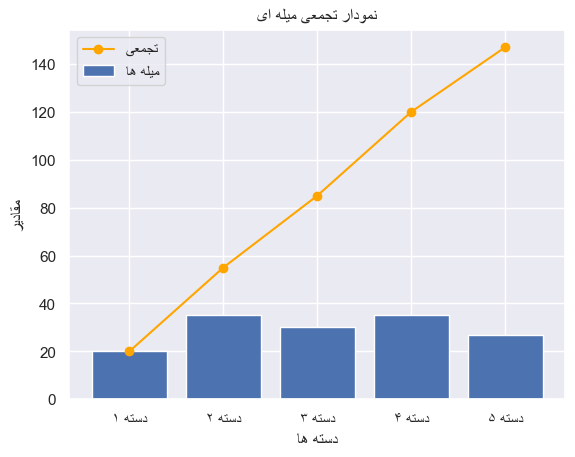

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# داده ها
categories = ['دسته ۱', 'دسته ۲', 'دسته ۳', 'دسته ۴', 'دسته ۵']
categories=list(map(reshape_farsi_text,categories))
values = [20, 35, 30, 35, 27]
sns.set_theme(style="darkgrid")
# رسم نمودار تجمعی میله ای
plt.bar(categories, values, label=reshape_farsi_text('میله ها'))

# اضافه کردن خط تجمعی
cumulative_values = np.cumsum(values)
plt.plot(categories, cumulative_values, c='orange', marker='o', label=reshape_farsi_text('تجمعی'))

# اضافه کردن راهنما
plt.legend()
reshape_farsi_text
# نام دهی محور‌ها و نام گذاری نمودار
plt.xlabel(reshape_farsi_text('دسته ها'))
plt.ylabel(reshape_farsi_text('مقادیر'))
plt.title(reshape_farsi_text('نمودار تجمعی میله ای'))

# نمایش نمودار
plt.show()


In [16]:
def to_persian_dates(dates):
    return list(map(lambda date:"/".join(nums_to_persian(date.split("/"),False)),dates))
def bar_line_data_convertor(data):
    data_sorted=sorted(data.items())
    dates =tuple(map(lambda d:d[0],data_sorted))
    values =tuple(map(lambda d:d[1],data_sorted))
    return dates,values
def dict_fillna_2columns(data):
    df=pd.DataFrame(data)
    df.sort_index(inplace=True)
    df.fillna(method='ffill',inplace=True)
    df.fillna(method='bfill',inplace=True)
    if df.isna().sum().sum() >0:
        df.fillna(df.mean(),inplace=True)
    elif df.isna().sum().sum() >0:
        df.fillna(0,inplace=True)
    dates =df.index
    values1 =df.values[:,0]
    values2 =df.values[:,1]
    return dates,values1,values2

def bar_line_title(labels):
    return f"نمودار مقایسه ای بین {labels[0]}, {labels[1]}"

def bar_line_title_cumsum(labels):
    labels.append(f"مقدار انباشته {labels[0]}")
    title = f" نمودار مقایسه {labels[0]} و مقدار انباشته {labels[0]}"
    return title,labels


In [3]:
import plotly.graph_objects as go
from seaborn import set_theme
import numpy as np
import pandas as pd

def to_persian_dates(dates):
    return list(map(lambda date:"/".join(nums_to_persian(date.split("/"),False)),dates))
def bar_line_data_convertor(data):
    data_sorted=sorted(data.items())
    dates =tuple(map(lambda d:d[0],data_sorted))
    values =tuple(map(lambda d:d[1],data_sorted))
    return dates,values
    
def bar_line_data_cumsum(data):
    data_sorted=sorted(data.items())
    dates =tuple(map(lambda d:d[0],data_sorted))
    # datesp1=to_persian_dates(dates)
    values1 =tuple(map(lambda d:d[1],data_sorted))
    values2=np.cumsum(values1)
    return dates,values1,values2
        
def dict_fillna_2columns(data):
    df=pd.DataFrame(data)
    df.sort_index(inplace=True)
    df.fillna(method='ffill',inplace=True)
    df.fillna(method='bfill',inplace=True)
    if df.isna().sum().sum() >0:
        df.fillna(df.mean(),inplace=True)
    elif df.isna().sum().sum() >0:
        df.fillna(0,inplace=True)
    dates =df.index
    values1 =df.values[:,0]
    values2 =df.values[:,1]
    return dates,values1,values2

def bar_line_title(labels):
    return f"نمودار مقایسه بین {labels[0]} و {labels[1]}"

def bar_line_title_cumsum(labels):
    labels.append(f"مقدار انباشته {labels[0]}")
    title = f" نمودار مقایسه {labels[0]} و مقدار انباشته {labels[0]}"
    return title,labels

def bar_line2(data,size_plot,labels,color,kind):
    if kind=="sade" and len(labels)==2:
        dates1 , values1,values2  =dict_fillna_2columns(data)
        
        title = bar_line_title(labels)
    elif kind=="anbashte" and len(labels)==1:
        
        keys=tuple(data.keys())
        dates1 , values1 , values2 =bar_line_data_cumsum(data)
        title,labels=bar_line_title_cumsum(labels)
        
        # dates2   =bar_line_data_convertor(data[keys[1]])
    else :
        print("has problem in kind or data or labals")
    y=round(0.85 +size_plot[1]/5000,2)
    y = y if y<1 else 1
    y2=round(1.1+size_plot[1]/20000,2)
    fig = go.Figure(
        data=go.Bar(
            x=dates1,
            y=values1,
            name=f"<b>{labels[0]}</b>",
            textfont={'family':"IRANSans","size":size_plot[0]/30} ,
            marker=dict(color=color[0]),
            ))
    fig.add_trace(
        go.Scatter(x=dates1,y=values2,yaxis="y2",name=f"<b>{labels[1]}</b>",marker=dict(color=color[1]),    ))
    
    fig.update_layout(
        legend={"orientation":"h","yanchor":'top',"y":y2,"xanchor":'left',"x":0,"font":{
                        'family':"IRANSans",
                        'size':int(size_plot[0]/50),} ,
                },
        autosize=True ,
        yaxis={
            "title":{"text":labels[0]+"به‌ریال","font":{
                        'family':"IRANSans",
                        'size':int(size_plot[1]/35),
                        # 'color':"#7f7f7f"
                        'color':"black" } ,  },
            "side":"left", },
        yaxis2={"title":{"text":labels[1]+"به‌ریال",
                             "font":{
                                    'family':"IRANSans",
                                    'size':int(size_plot[1]/35),
                                    'color':"black" } , },
                    "side":"right",
                    "overlaying":"y",
                    "tickmode":"sync", },
        # legend_title={"text":"نمودار"},
        title = {'text': title,"xanchor":'center',"yanchor":'top',"y": y,"x":0.5,
                 "font":{
                        'family':"IRANSans",
                        'size':int(size_plot[0]/30),
                        # 'color':"#7f7f7f"
                        'color':"black" } ,   } )
    
    fig.update_layout(width=size_plot[0], height=size_plot[1])
    fig.show()

In [4]:
color=["paleturquoise","crimson"]

data_for_anbashte= {
    "1399/02/19":16590004000 ,
    "1402/03/03":12940000000,
    "1402/03/01":50594000000,
    "1402/05/01":20594000000,
    "1402/07/01":10940000000,   }

labels_anbashte =[ "طلب‌ها" ] # len must be 1
kind_anbashte="anbashte"

## 400 <size_plot <600
size_plot =(600,400)
# kind = "sade" or "anbashte"
kind="sade"
labels=[ "طلب‌ها" ,"بدهی ها"] # len must be 2
data = {
    'بدهی': {
        '1399/02/21':16594 ,
        '1402/05/02':4124 ,
        '1399/04/01':12470
    } ,
    'طلب':{
        '1399/02/23':20000 ,
        '1402/04/02':10000 ,
        '1399/03/01':15000
    }}
bar_line2(data_for_anbashte,size_plot,labels_anbashte,color,kind_anbashte)
# bar_line2(data,size_plot,labels,color,kind)

In [2]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
def bar_line_data_cumsum(data):
    data_sorted=sorted(data.items())
    dates =tuple(map(lambda d:d[0],data_sorted))
    # datesp1=to_persian_dates(dates)
    values1 =tuple(map(lambda d:d[1],data_sorted))
    values2=np.cumsum(values1)
    return dates,values1,values2
       



def to_persian_dates(dates):
    return list(map(lambda date:"/".join(nums_to_persian(date.split("/"),False)),dates))
def bar_line_data_convertor(data):
    data_sorted=sorted(data.items())
    dates =tuple(map(lambda d:d[0],data_sorted))
    values =tuple(map(lambda d:d[1],data_sorted))
    return dates,values
    
def bar_line_data_cumsum(data):
    data_sorted=sorted(data.items())
    dates =tuple(map(lambda d:d[0],data_sorted))
    # datesp1=to_persian_dates(dates)
    values1 =tuple(map(lambda d:d[1],data_sorted))
    values2=np.cumsum(values1)
    return dates,values1,values2
        
def dict_fillna_2columns(data):
    df=pd.DataFrame(data)
    df.sort_index(inplace=True)
    df.fillna(method='ffill',inplace=True)
    df.fillna(method='bfill',inplace=True)
    if df.isna().sum().sum() >0:
        df.fillna(df.mean(),inplace=True)
    elif df.isna().sum().sum() >0:
        df.fillna(0,inplace=True)
    dates =df.index
    values1 =df.values[:,0]
    values2 =df.values[:,1]
    return dates,values1,values2

def bar_line_title(labels):
    return f"نمودار مقایسه بین {labels[0]} و {labels[1]}"

def bar_line_title_cumsum(labels):
    labels.append(f"مقدار انباشته {labels[0]}")
    title = f" نمودار مقایسه {labels[0]} و مقدار انباشته {labels[0]}"
    return title,labels





def bar_line(data,size_plot,labels,color,kind):

    if kind=="sade" and len(labels)==2:
        dates1 , values1,values2  =dict_fillna_2columns(data)
        labels=tuple(data.keys())
        title = bar_line_title(labels)
    elif kind=="anbashte" and len(labels)==1:
        
        # labels=list(data.keys())
        dates1 , values1 , values2 =bar_line_data_cumsum(data)
        title,labels=bar_line_title_cumsum(labels)
        
        # dates2   =bar_line_data_convertor(data[keys[1]])
    else :
        raise ValueError("has problem in kind or data or labals")
    fig = go.Figure(
        data=go.Bar(
            x=dates1,
            y=values1,
            name=f"<b>{labels[0]}</b>",
            textfont={'family':"IRANSans","size":size_plot[0]/30} ,
            marker=dict(color=color[0]),
            
            ))
    fig.add_trace(
        go.Scatter(x=dates1,y=values2,yaxis="y2",name=f"<b>{labels[1]}</b>",marker=dict(color=color[1]),    ))
    
    y=round(0.85 +size_plot[1]/5000,2)
    y = y if y<1 else 1
    y2=round(1.1+size_plot[1]/20000,2)
    fig.update_layout(
        legend={"orientation":"h","yanchor":'top',"y":y2,"xanchor":'left',"x":0,"font":{
                        'family':"IRANSans",
                        'size':int(size_plot[0]/50),} ,
                },
        autosize=True ,
        yaxis={
            "title":{"text":labels[0]+"(به‌ریال)","font":{
                        'family':"IRANSans",
                        'size':int(size_plot[1]/35),
                        # 'color':"#7f7f7f"
                        'color':"black" } ,  },
            "side":"left", },
        yaxis2={"title":{"text":labels[1]+"(به‌ریال)",
                             "font":{
                                    'family':"IRANSans",
                                    'size':int(size_plot[1]/35),
                                    'color':"black" } , },
                    "side":"right",
                    "overlaying":"y",
                    "tickmode":"sync", },
        # legend_title={"text":"نمودار"},
        title = {'text': title,"xanchor":'center',"yanchor":'top',"y": y,"x":0.5,
                 "font":{
                        'family':"IRANSans",
                        'size':int(size_plot[0]/30),
                        # 'color':"#7f7f7f"
                        'color':"black" } ,   } )
    
    fig.update_layout(width=size_plot[0], height=size_plot[1])
    
    ### if want run in local uncomment line down
    fig.show()
    

    
    
    
# ورودی های نمودار plot_line
color=["paleturquoise","crimson"]

data_for_anbashte= {
    "1399/02/19":16594 ,
    "1402/03/03":12940,
    "1402/03/01":50594,
    "1402/05/01":20594,
    "1402/07/01":10940,   }

labels_anbashte =[ "طلب‌ها" ] # len must be 1
kind_anbashte="anbashte"

## 400 <size_plot <600
size_plot =(600,400)
# kind = "sade" or "anbashte"
kind="sade"
labels=[ "طلب‌ها" ,"بدهی ها"] # len must be 2
data = {
    'بدهی': {
        '1399/02/21':16594 ,
        '1402/05/02':4124 ,
        '1399/04/01':12470
    } ,
    'طلب':{
        '1399/02/23':20000 ,
        '1402/04/02':10000 ,
        '1399/03/01':15000
    }}
bar_line(data_for_anbashte,size_plot,labels_anbashte,color,kind_anbashte)
# bar_line(data,size_plot,labels,color,kind)

In [ ]:
np.transpose([values])
values

(16594, 1694, 15594)

In [ ]:
values=tuple(data.values())
keys = tuple(data.keys())
s1=pd.Series(values,name=labels[0],index=keys).sort_index()
s2=s1.cumsum()
s2.name = labels[1]

s1


1399/02/19    16594
1402/03/01    15594
1402/03/03     1694
Name: طلب‌ها, dtype: int64

In [ ]:
values


array([16594, 32188, 33882])

In [ ]:

df=pd.s(np.transpose([values]),index=keys,columns=labels[0])
df.sort_index(inplace=True)
df[labels[1]]=np.cumsum(values)
df

In [ ]:

df=pd.Series(data,name=labels[0])
df

1399/02/19    16594
1402/03/03     1694
1402/03/01    15594
Name: طلب‌ها, dtype: int64

In [ ]:
print(title)
for i in labels:
    print(i)

 مقایسه‌ طلب‌ها و مقدار انباشته طلب‌ها
طلب‌ها
مقدار انباشته طلب‌ها


In [ ]:
import plotly.express as px
df = px.data.iris()

import plotly.graph_objects as go
fig = go.Figure(data=[go.Histogram(y=df['sepal_width'], cumulative_enabled=True)])
fig.show()
